<a href="https://colab.research.google.com/github/rmpbastos/data_science/blob/master/Analysing_Vancouver_Airbnb_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Analyzing Vancouver Airbnb Data

[Airbnb](https://www.airbnb.com/) can be considered **the largest hotel chain in the world**, although the company **does not own any of the real estate listed** on their website!

Connecting travelers worldwide with hosts that are willing to earn extra money from renting their places, Airbnb became a huge success since it was founded, in 2008.

Around 10 years after it was established, the company has already hosted **over 300 million clients** and counts with about **7 million listings worldwide**, fiercely competing with traditional hotel chains.

Being a data-driven company, Airbnb shares a lot of data for free through the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html). 

We are going to analyze the data of the city of Vancouver, utilizing Python to build data science algorithms, and extract information regarding prices, neighborhoods, rental types and the correlation between some of these variables.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## Gathering the Data


These are the libraries we are going to use.

In [0]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

For our exploratory analysis, we are going to utilize the file `listings.csv`, downloaded from [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [25]:
# import the csv file to a DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/bc/vancouver/2020-05-11/visualisations/listings.csv')
print('Data successfully read!')

Data successfully read!


## Data Analysis


Let's check the variables contained in our data frame.

**Variables library**

* `id` - Unique id number identifying the property
* `name` - Property name/description
* `host_id` - Unique id number identifying the host
* `host_name` - Hostname
* `neighbourhood_group` - This column has no valid content
* `neighbourhood` - Neighborhood name
* `latitude` - Property latitude
* `longitude` - Property longitude
* `room_type` - Type of place
* `price` - Rental price per night
* `minimum_nights` - Minimum amount of nights for rental
* `number_of_reviews` - Number of reviews received
* `last_review` - Date of the last received review
* `reviews_per_month` - Number of monthly reviews
* `calculated_host_listings_count` - Quantity of properties from the same host
* `availability_365` - Number of available days within the year

Let's display the first five rows of our data frame.

In [26]:
# first 5 rows of df
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,90,16,2017-02-26,0.15,49,347
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,242,2020-04-30,1.94,1,211
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,161,30,58,2020-03-24,0.47,3,335
3,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28209,-123.12515,Entire home/apt,70,30,427,2019-08-04,3.54,1,57
4,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,85,2020-04-18,0.78,1,326


### **How many variables and entries are there in our dataset? What are the variable types?**

In [27]:
# identify the shape of the data frame
print('Entries:\t {}'.format(df.shape[0]))
print('Variables:\t {}\n'.format(df.shape[1]))

# show the variables types
print(df.dtypes)

Entries:	 5806
Variables:	 16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


Our data frame has 5806 rows and 16 columns.

### **What is the proportion of null values in the dataset?**

In [28]:
# percentage of null values in descending order
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.149501
last_review                       0.149501
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

As we can see, the variable `neighbourhood_group` has no valid content, so let's drop this column.

In [29]:
df.drop(['neighbourhood_group'], axis=1, inplace=True)
df.shape

(5806, 15)

After dropping the `neighbourhood_group` column, we are now working with 15 columns.

### **Variable Distribution**

Let's plot some histograms to identify the distribution of each variable.

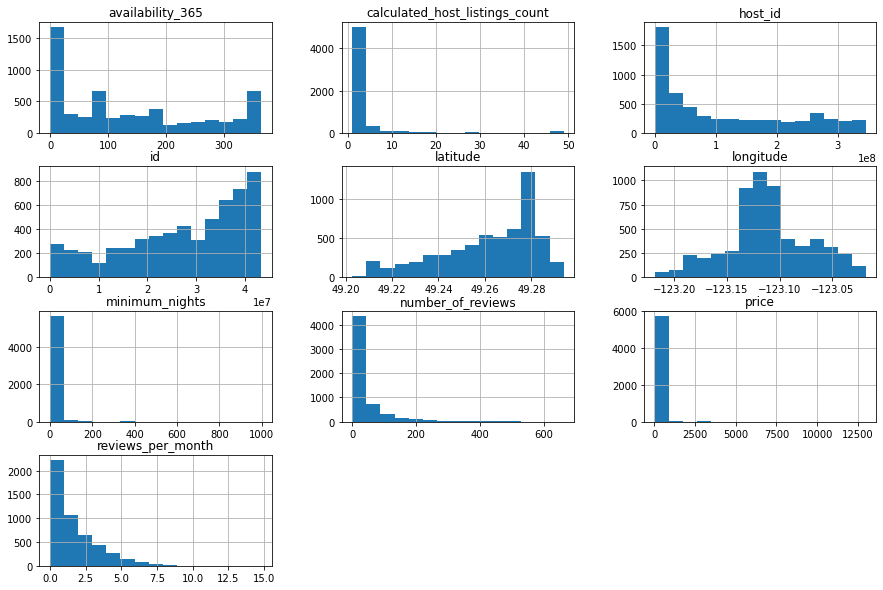

In [33]:
# plot histograms of numeric variables
df.hist(bins=15, figsize=(15,10));

Analyzing the histograms, we can notice that some variables are oddly distributed. Take `price`, `minimun_nights` and `calculated_host_listings_count` as an example. Their distribution shows evidence of the presence of outliers, distorting the histogram representation.

### **Checking and removing outliers**

Let's generate some descriptive statistics of our numeric variables.

In [34]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5806.000000,5806.00000,5806.000000,4938.000000,5806.000000,5806.000000
mean,174.295040,14.15794,35.012745,1.724563,3.598691,137.496900
std,266.424203,34.78132,56.734073,1.667647,7.162984,126.036135
min,13.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,1.00000,2.000000,0.430000,1.000000,6.250000
50%,125.000000,3.00000,13.000000,1.170000,1.000000,102.000000
75%,200.000000,30.00000,44.000000,2.560000,3.000000,244.000000
max,12999.000000,998.00000,662.000000,14.820000,49.000000,365.000000


Considering the analysis above, we can confirm our hypothesis. Notice that 75% of `price` values are below 200.00 but we have a maximum value of 12,999.00.

As for `minimum_nights`, we can also notice some disparity. The value of the third quartile is 30 nights while the maximum value found was as high as 998 nights!

Let's now generate boxplots for the `price` and `minimum_nights` columns, so we can better identify the outliers.

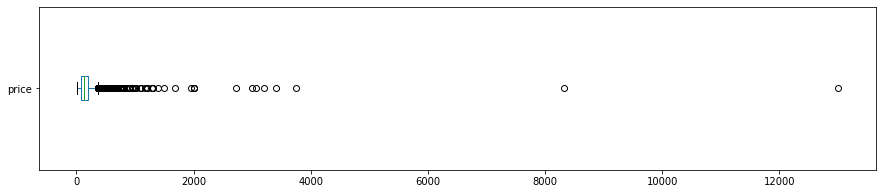


price: values higher than $1,000: 29
0.4995%


In [37]:
# price bloxplot
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# quantity of values higher than 1,000 for price
print('\nprice: values higher than $1,000: {}'.format(len(df[df.price > 1000])))
print('{:.4f}%'.format((len(df[df.price > 1000]) / df.shape[0]) * 100))

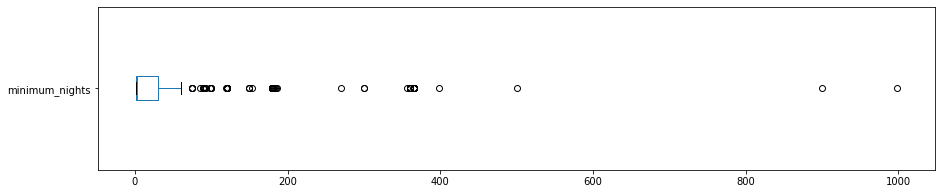


minimum_nights: values higher than 30 days: 349
6.0110%


In [43]:
# minimum_nights boxplot
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# quantity of values higher than 30 days for minimum_nights
print('\nminimum_nights: values higher than 30 days: {}'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

Notice that we have a meager 0.49% of prices over 1,000 and 6% of values higher than 30 days for the minimum amount of nights.

Now, let's clean our data frame, eliminating these outliers, and plot our new results.

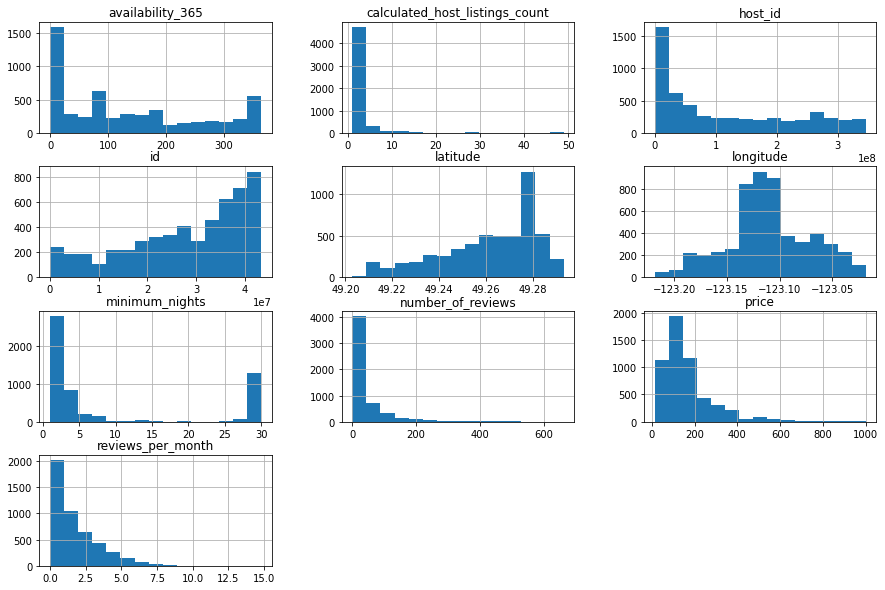

In [47]:
# remove the outliers in a new data frame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plot histograms of numeric variables
df_clean.hist(bins=15, figsize=(15,10));

Now that we have cleaned the dataset, let's get some answers from our data.

### **What is the average rental price?**

In [53]:
# average of the `price` column
print('The average rental price is: ${:.2f}'.format(df_clean.price.mean()))

The average rental price is: $164.92


### **What is the average of minimum_nights?**

In [66]:
# average of the `minimum_nights` column
print('The average of minimum_nights is: {:.2f}'.format(df_clean.minimum_nights.mean()))

The average of minimum_nights is: 9.31


### **What is the correlation between variables**,

Let's identify if there is any correlation between the numeric variables in our dataset.

In [54]:
# create and show the correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.107566,-0.089474,-0.039026,-0.112850,0.060288
minimum_nights,-0.107566,1.000000,-0.139335,-0.277812,0.217424,0.162534
number_of_reviews,-0.089474,-0.139335,1.000000,0.670843,-0.144425,0.056520
reviews_per_month,-0.039026,-0.277812,0.670843,1.000000,-0.162127,0.030514
calculated_host_listings_count,-0.112850,0.217424,-0.144425,-0.162127,1.000000,0.096960
availability_365,0.060288,0.162534,0.056520,0.030514,0.096960,1.000000


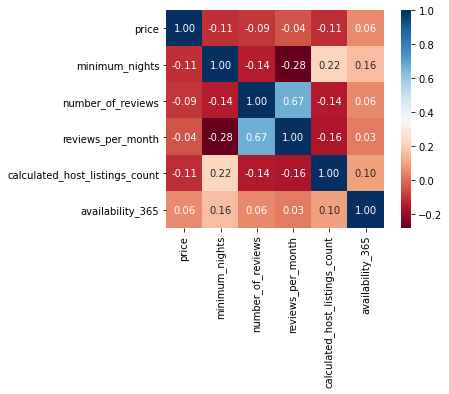

In [56]:
# plot a correlation heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Aside from an expected positive correlation between `number_of_reviews` and `reviews_per_month`, we can see that no other variables are significantly correlated.

### **Which type of place is the most rented in Airbnb?**

The `room_type` column indicates the type of place being offered by the host, such as the **entire place**, **private room**, **shared room**, or **hotel room**. Let's examine the types of places offered in Vancouver.

In [57]:
# quantity of available places per type
df_clean.room_type.value_counts()

Entire home/apt    3935
Private room       1434
Shared room          49
Hotel room           13
Name: room_type, dtype: int64

In [60]:
# proportion of each type of place
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.724544
Private room       0.264040
Shared room        0.009022
Hotel room         0.002394
Name: room_type, dtype: float64

As we can see, entire homes count for the majority of places available for rent in Vancouver, with about 72%, while private rooms also have a considerable share, with 26%.

### **Which neighborhood is the most expensive to rent a place?**

Now, let's analyze the rental costs for each neighborhood.

In [61]:
# average price for neighborhood
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Downtown             203.746998
Kitsilano            195.880266
Downtown Eastside    186.415808
Dunbar Southlands    182.834395
West Point Grey      178.666667
Shaughnessy          169.469880
South Cambie         166.951220
Mount Pleasant       166.630363
West End             163.474627
Arbutus Ridge        161.282828
Name: price, dtype: float64

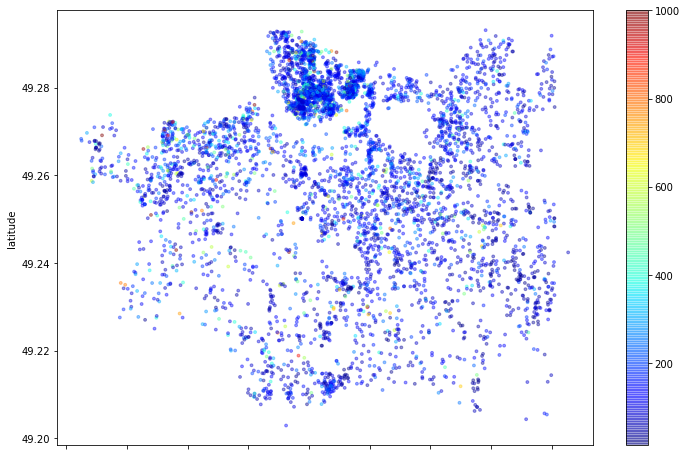

In [64]:
# plot properties by latitude and longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusion


After exploring the Airbnb dataset for Vancouver we could get some interesting insights. We were able to identify which type of place is the most common, as well as determine the average rental price per neighborhood. We also which neighborhoods have the highest prices.

During the analysis we found some outliers, distorting the examination of the dataset. Once we cleaned the data, our data frame became more adequate for a reliable exploratory analysis.

Keep in mind that this was just a brief introduction of what be done and the questions that can be answered utilizing the database of Airbnb. The dataset utilized here is a summary with 16 attributes. For a deeper analysis, there is a dataset at [Inside Airbnb](http://insideairbnb.com/get-the-data.html) with 106 attributes.